<a href="https://colab.research.google.com/github/pirumba/deeplearning/blob/main/Chest_opacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import PIL.Image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Connecting Google colab to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Data Set

In [3]:
import pathlib
dataset1 = "/content/drive/MyDrive/deep_learning_project/dataset1"
train_ds = tf.keras.utils.image_dataset_from_directory(dataset1, validation_split=0.2, subset="training", seed=123, image_size=(100,100),batch_size=20)


Found 715 files belonging to 2 classes.
Using 572 files for training.


Explore the data

Verifying Data class names

In [4]:
class_names = train_ds.class_names
print(class_names)

['normal', 'sick']


Verifying images to be used for validation

In [5]:
valid_ds = tf.keras.utils.image_dataset_from_directory(dataset1, validation_split=0.2,subset="validation", seed=123, image_size=(100, 100), batch_size=20)

Found 715 files belonging to 2 classes.
Using 143 files for validation.


viewing sample images of the train data

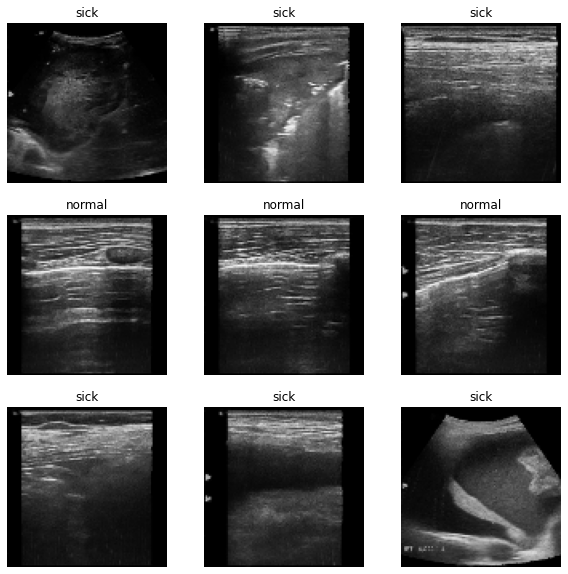

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, lebels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[lebels[i]])
    plt.axis("off")

checking the shape of the images

In [7]:
for image_batch, lebels_batch in train_ds:
  print(image_batch.shape)
  print(lebels_batch.shape)
  break

(20, 100, 100, 3)
(20,)


Autotunning the training dataset and validation dataset

In [8]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1500).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)


Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

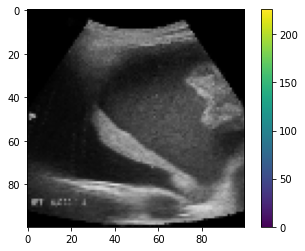

In [9]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.imshow(images[i].numpy().astype("uint8"))
#plt.imshow(train_ds[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

Normalizing datasets

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, lebels_batch = next(iter(normalized_ds))
first_image = image_batch[3]
print(np.min(first_image), np.max(first_image))


0.0 0.97843343
